In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

# Importing Deep Learning Libraries
from tensorflow.keras.utils import img_to_array, load_img
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense,Input,Dropout,GlobalAveragePooling2D,Flatten,Conv2D,BatchNormalization,Activation,MaxPooling2D
from keras.models import Model,Sequential
from keras.optimizers import Adam,SGD,RMSprop
import tensorflow as tf

In [ ]:
from zipfile import ZipFile
import os 
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
with ZipFile('/content/drive/MyDrive/archive.zip','r') as zipObj:
  zipObj.extractall('/content/')

In [ ]:
picture_size = 48
folder_path = "/content/images/"

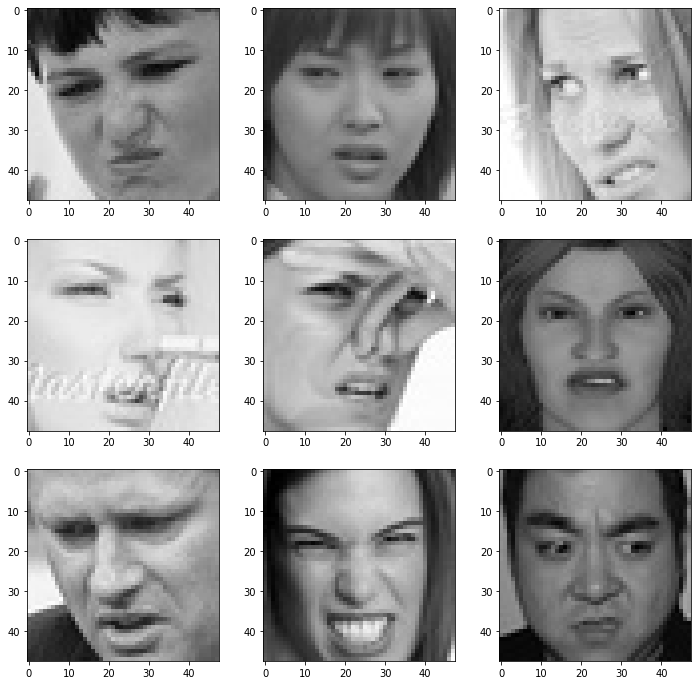

In [ ]:
expression = 'disgust'

plt.figure(figsize= (12,12))
for i in range(1, 10, 1):
    plt.subplot(3,3,i)
    img = load_img(folder_path+"train/"+expression+"/"+
                  os.listdir(folder_path + "train/" + expression)[i], target_size=(picture_size, picture_size))
    plt.imshow(img)   
plt.show()

In [ ]:
batch_size  = 32

datagen_train  = ImageDataGenerator(rescale=1./255)
datagen_val = ImageDataGenerator(rescale=1./255)

train_data = datagen_train.flow_from_directory(folder_path+"train",
                                              target_size = (picture_size,picture_size),
                                              color_mode = "grayscale",
                                              batch_size=batch_size,
                                              class_mode='categorical',
                                              shuffle=True)


valid_data = datagen_val.flow_from_directory(folder_path+"validation",
                                              target_size = (picture_size,picture_size),
                                              color_mode = "grayscale",
                                              batch_size=batch_size,
                                              class_mode='categorical',
                                              shuffle=False)


nb_train_samples = len(train_data.filenames) 
num_classes = len(train_data.class_indices)

train_labels = train_data.classes 
test_labels = valid_data.classes
#tf.one_hot(train_labels, depth=7)


Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


In [ ]:
from keras.optimizers import Adam,SGD,RMSprop


no_of_classes = 7

model = Sequential()

#1st CNN layer
model.add(Conv2D(128,(3,3),padding = 'same',input_shape = (48,48,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.5))

#2nd CNN layer
model.add(Conv2D(512,(5,5),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.25))

#2nd CNN layer
model.add(Conv2D(512,(5,5),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.5))


#3rd CNN layer
model.add(Conv2D(512,(3,3),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.25))

#4th CNN layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))


model.add(Flatten())

#Fully connected 1st layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))


# Fully connected layer 2nd layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(no_of_classes, activation='softmax'))


model.compile(loss=tf.keras.losses.CategoricalCrossentropy(), # SparseCategoricalCrossentropy
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics=['accuracy'])



In [ ]:
epochs = 48
resnet_history = model.fit(train_data,
                            epochs=epochs,
                            steps_per_epoch=len(train_data),
                            validation_data=valid_data,
                            validation_steps=len(valid_data))

Epoch 1/48
901/901 [==============================] - 61s 64ms/step - loss: 1.8993 - accuracy: 0.2364 - val_loss: 1.8036 - val_accuracy: 0.2888
Epoch 2/48
901/901 [==============================] - 55s 61ms/step - loss: 1.5250 - accuracy: 0.4066 - val_loss: 1.4430 - val_accuracy: 0.4374
Epoch 3/48
901/901 [==============================] - 56s 62ms/step - loss: 1.3474 - accuracy: 0.4836 - val_loss: 1.5545 - val_accuracy: 0.4174
Epoch 4/48
901/901 [==============================] - 55s 61ms/step - loss: 1.2622 - accuracy: 0.5182 - val_loss: 1.3498 - val_accuracy: 0.4628
Epoch 5/48
901/901 [==============================] - 55s 61ms/step - loss: 1.1941 - accuracy: 0.5456 - val_loss: 1.3117 - val_accuracy: 0.4839
Epoch 6/48
901/901 [==============================] - 55s 61ms/step - loss: 1.1407 - accuracy: 0.5708 - val_loss: 1.2633 - val_accuracy: 0.5200
Epoch 7/48
901/901 [==============================] - 55s 61ms/step - loss: 1.0959 - accuracy: 0.5885 - val_loss: 1.1482 - val_accuracy:

In [ ]:
from keras.optimizers import RMSprop,SGD,Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint("./model.h5", monitor='val_acc', verbose=1, save_best_only=True, mode='max')

#early_stopping = EarlyStopping(monitor='val_loss',
 #                         min_delta=0,
  #                        patience=3,ute
   #                       verbose=1,
    #                      restore_best_weights=True
     #                     )

reduce_learningrate = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.2,
                              patience=3,
                              verbose=1,
                              min_delta=0.0001)

callbacks_list = [checkpoint,reduce_learningrate]

epochs = 48

model.compile(loss='categorical_crossentropy',
              optimizer = Adam(lr=0.001),
              metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
history = model.fit_generator(generator=train_data,
                                steps_per_epoch=train_data.n//train_data.batch_size,
                                epochs=10,
                                validation_data = valid_data,
                                validation_steps = valid_data.n//valid_data.batch_size,
                                callbacks=callbacks_list
                                )

Epoch 1/10
  1/900 [..............................] - ETA: 1:17 - loss: 0.1316 - accuracy: 0.9688

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


900/900 [==============================] - ETA: 0s - loss: 0.1721 - accuracy: 0.9419

900/900 [==============================] - 56s 62ms/step - loss: 0.1721 - accuracy: 0.9419 - val_loss: 1.5926 - val_accuracy: 0.6426 - lr: 0.0010
Epoch 2/10
900/900 [==============================] - ETA: 0s - loss: 0.1622 - accuracy: 0.9435

900/900 [==============================] - 56s 62ms/step - loss: 0.1622 - accuracy: 0.9435 - val_loss: 1.6244 - val_accuracy: 0.6375 - lr: 0.0010
Epoch 3/10
900/900 [==============================] - ETA: 0s - loss: 0.1578 - accuracy: 0.9454

900/900 [==============================] - 56s 62ms/step - loss: 0.1578 - accuracy: 0.9454 - val_loss: 1.6482 - val_accuracy: 0.6142 - lr: 0.0010
Epoch 4/10
900/900 [==============================] - ETA: 0s - loss: 0.1551 - accuracy: 0.9472

900/900 [==============================] - 56s 62ms/step - loss: 0.1551 - accuracy: 0.9472 - val_loss: 1.4897 - val_accuracy: 0.6483 - lr: 0.0010
Epoch 5/10
900/900 [==============================] - ETA: 0s - loss: 0.1531 - accuracy: 0.9483

900/900 [==============================] - 54s 60ms/step - loss: 0.1531 - accuracy: 0.9483 - val_loss: 1.5968 - val_accuracy: 0.6260 - lr: 0.0010
Epoch 6/10
900/900 [==============================] - ETA: 0s - loss: 0.1492 - accuracy: 0.9485

900/900 [==============================] - 56s 63ms/step - loss: 0.1492 - accuracy: 0.9485 - val_loss: 1.5663 - val_accuracy: 0.6480 - lr: 0.0010
Epoch 7/10
900/900 [==============================] - ETA: 0s - loss: 0.1490 - accuracy: 0.9495


Epoch 7: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
900/900 [==============================] - 55s 61ms/step - loss: 0.1490 - accuracy: 0.9495 - val_loss: 1.7817 - val_accuracy: 0.6266 - lr: 0.0010
Epoch 8/10
900/900 [==============================] - ETA: 0s - loss: 0.1172 - accuracy: 0.9595

900/900 [==============================] - 56s 62ms/step - loss: 0.1172 - accuracy: 0.9595 - val_loss: 1.5254 - val_accuracy: 0.6683 - lr: 2.0000e-04
Epoch 9/10
900/900 [==============================] - ETA: 0s - loss: 0.0977 - accuracy: 0.9661

900/900 [==============================] - 56s 62ms/step - loss: 0.0977 - accuracy: 0.9661 - val_loss: 1.5841 - val_accuracy: 0.6729 - lr: 2.0000e-04
Epoch 10/10
900/900 [==============================] - ETA: 0s - loss: 0.0883 - accuracy: 0.9692


Epoch 10: ReduceLROnPlateau reducing learning rate to 4.0000001899898055e-05.
900/900 [==============================] - 56s 62ms/step - loss: 0.0883 - accuracy: 0.9692 - val_loss: 1.6216 - val_accuracy: 0.6706 - lr: 2.0000e-04


In [ ]:
model.save("model.h5")

In [ ]:
import tensorflow as tf
tf.random.set_seed(42)
IMAGE_SHAPE = (224, 224)
BATCH_SIZE = 32



train_dir = '/content/images/train'
test_dir = '/content/images/validation'

train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size=BATCH_SIZE, #multiplo 2
                                               target_size=IMAGE_SHAPE, #512,256
                                               class_mode='categorical',
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                               batch_size=BATCH_SIZE,
                                               target_size=(224,224),
                                               class_mode='categorical',
                                               seed=42)

Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


In [ ]:
# Create Tensorboard callback
import datetime

def create_tensorboard_callback(dir_name, experiment_name):
  log_dir = dir_name + '/' + experiment_name + '/' + datetime.datetime.now().strftime('%Y%m%d-%H%M%S')
  tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir)
  print(f"Saving Tensorboard log files to: {log_dir}")
  return tensorboard_callback

In [ ]:
resnet_url = 'https://tfhub.dev/google/imagenet/resnet_v2_50/feature_vector/5'
efficientnet_url = 'https://tfhub.dev/tensorflow/efficientnet/b0/feature-vector/1'

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras import layers

In [ ]:
def create_model(mode_url, num_classes=7):
  feature_extractor_layer = hub.KerasLayer(mode_url, 
                                           trainable=False,
                                           name='feature_extraction_layer',
                                           input_shape=IMAGE_SHAPE + (3,))  # Freeze the already learned patterns
  model = tf.keras.Sequential()
  model.add(feature_extractor_layer)
  model.add(tf.keras.layers.Dense(7, activation='softmax', name='output_layer'))
  return model

In [ ]:
resnet_model = create_model(efficientnet_url, num_classes=train_data.num_classes)

In [ ]:
resnet_model.summary()

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 feature_extraction_layer (K  (None, 1280)             4049564   
 erasLayer)                                                      
                                                                 
 output_layer (Dense)        (None, 7)                 8967      
                                                                 
Total params: 4,058,531
Trainable params: 8,967
Non-trainable params: 4,049,564
_________________________________________________________________


In [ ]:
resnet_model.compile(loss='categorical_crossentropy',
                     optimizer=tf.keras.optimizers.Adam(),
                     metrics=['accuracy'])

In [ ]:
resnet_history = resnet_model.fit(train_data,
                                  epochs=40,
                                  steps_per_epoch=len(train_data),
                                  validation_data=valid_data,
                                  validation_steps=len(valid_data),
                                  callbacks=[create_tensorboard_callback(dir_name='tensor_hub',
                                                                         experiment_name='resnet50V2')])

Saving Tensorboard log files to: tensor_hub/resnet50V2/20221130-053924
Epoch 1/40
901/901 [==============================] - 73s 79ms/step - loss: 1.2071 - accuracy: 0.5463 - val_loss: 1.2864 - val_accuracy: 0.5241
Epoch 2/40
901/901 [==============================] - 71s 79ms/step - loss: 1.2033 - accuracy: 0.5508 - val_loss: 1.2874 - val_accuracy: 0.5215
Epoch 3/40
901/901 [==============================] - 71s 78ms/step - loss: 1.1995 - accuracy: 0.5506 - val_loss: 1.2854 - val_accuracy: 0.5207
Epoch 4/40
901/901 [==============================] - 71s 78ms/step - loss: 1.1943 - accuracy: 0.5514 - val_loss: 1.2884 - val_accuracy: 0.5217
Epoch 5/40
901/901 [==============================] - 72s 80ms/step - loss: 1.1910 - accuracy: 0.5538 - val_loss: 1.2840 - val_accuracy: 0.5222
Epoch 6/40
901/901 [==============================] - 71s 79ms/step - loss: 1.1858 - accuracy: 0.5549 - val_loss: 1.2869 - val_accuracy: 0.5212
Epoch 7/40
901/901 [==============================] - 71s 79ms/st